In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [6]:
data_FF = pd.read_excel('D:\\NUIG\\Final Project\\FBAdlibraryScraping\\FiannaFail_Final.xlsx')
data_FG = pd.read_excel('D:\\NUIG\\Final Project\\FBAdlibraryScraping\\FineGael_Final.xlsx')
data_SF = pd.read_excel('D:\\NUIG\\Final Project\\FBAdlibraryScraping\\SinnFein_Final.xlsx')

data_SF.head(5)

,Ad number,ID,Description,Problem Sector,Period,AmountSpent,Impressions,Disclaimer,Party,StartDate,...,MaxAmount,AvgAmount,AvgImpressions,No of Ad Versions,AggregatedImpressions,AggregatedAmount,Total Impressions,Total Amount,OpinionPollDate,Votes
0,1,2615263148714989,"Painéal: Pearse Doherty, Mairéad Farrell agus ...",General,25 May 2020-27 May 2020,€100-€199,10K-50K people,Sponsored • Paid for by Sinn Féin,Sinn Féin Ireland,2020-05-25,...,199,149.5,30000,2,105000.0,100.0,135000,249.5,2020-02-08,535022.425
1,2,1538506679643497,The government's exclusion of women returning ...,Jobs,18 May 2020-20 May 2020,€200-€299,100K-500K people,When an advertiser categorises their ad as bei...,Sinn Féin Ireland,2020-05-18,...,299,249.5,300000,4,1200000.0,349.5,1500000,599.0,2020-02-08,535022.425
2,3,174858850491822,"Join Mary Lou McDonald, Michelle O'Neill, Pear...",General,14 May 2020-17 May 2020,€300-€399,100K-500K people,LIVE Q&A with Sinn Féin's Leadership Team,Sinn Féin Ireland,2020-05-14,...,399,349.5,300000,2,600000.0,249.5,900000,599.0,2020-02-08,535022.425
3,4,1186866171668459,"Join Mary Lou, Michelle O'Neill, Deirdre Harge...",Health,1 May 2020-3 May 2020,€200-€299,100K-500K people,LIVE Online Public Meeting - Leadership and Mi...,Sinn Féin Ireland,2020-05-01,...,299,249.5,300000,1,0.0,0.0,300000,249.5,2020-02-08,535022.425
4,5,254138499304891,Join me and the Sinn Féin leadership team on M...,General,19 Apr 2020-20 Apr 2020,<€100,100K-500K people,Sponsored • Paid for by Sinn Féin,Sinn Féin Ireland,2020-04-19,...,100,100.0,300000,1,0.0,0.0,300000,100.0,2020-02-08,535022.425


In [3]:
sdata_FF = data_FF[['StartDate', 'Description']]
sdata_FG = data_FG[['StartDate', 'Description']]
sdata_SF = data_SF[['StartDate', 'Description']]

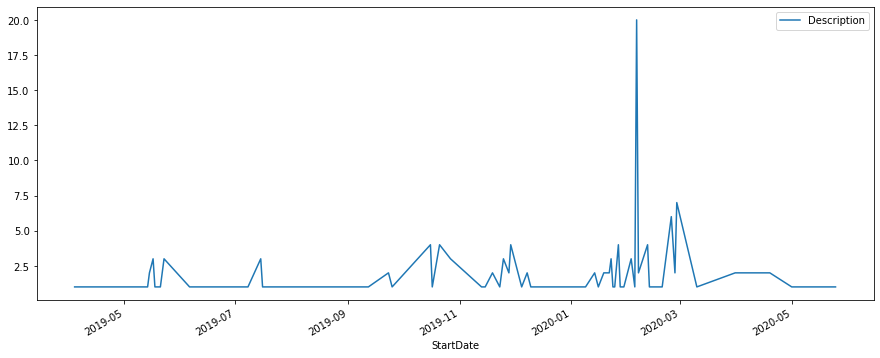

In [79]:
SF = sdata_SF.groupby(["StartDate"]).count().sort_values("Description", ascending=False)

SF['Description']


SF.plot(figsize=(15, 6))
plt.show()

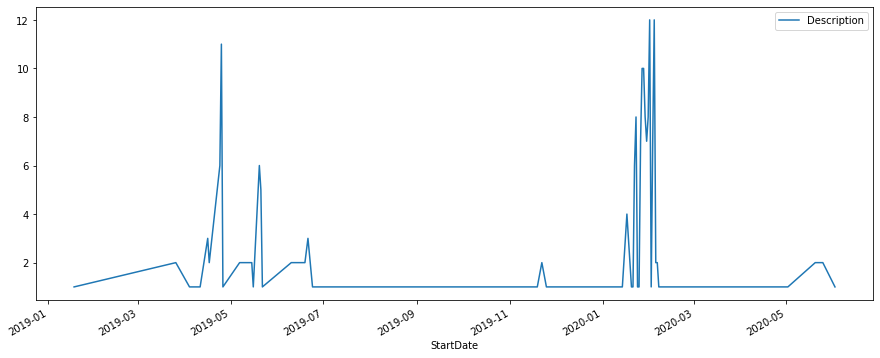

In [80]:
FF = sdata_FF.groupby(["StartDate"]).count().sort_values("Description", ascending=False)

FF['Description']


FF.plot(figsize=(15, 6))
plt.show()

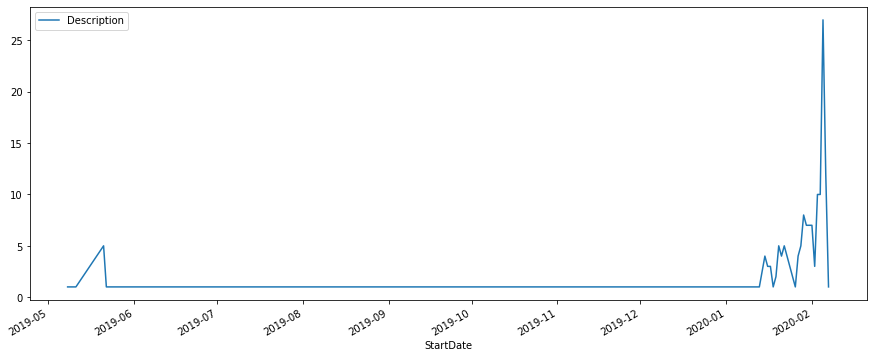

In [83]:
FG = sdata_FG.groupby(["StartDate"]).count().sort_values("Description", ascending=False)

FG['Description']


FG.plot(figsize=(15, 6))
plt.show()

In [73]:
n_by_desc = data.groupby(["StartDate"]).count().sort_values("Description", ascending=False)

              

,ID,Description,Problem Sector (Manual),Period,EndDate,Duration in Days,AmountSpent,MinAmount,MaxAmount,AvgAmount,Impressions,MinImpressions,MaxImpressions,AvgImpressions,Disclaimer,Party,OpinionPollDate,Votes
StartDate,,,,,,,,,,,,,,,,,,
2020-02-04,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
2020-02-01,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
2019-04-25,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
2020-01-28,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2020-01-27,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-25,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
2019-12-04,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2019-12-18,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [66]:
d= data.loc[data['StartDate'] =='2020-02-04', 'Description']
d

139                                    WWW.FIANNAFAIL.IE
140    Thanks to Mary Burke & Catherine O'Carroll sis...
141    <U+0001F3B6><U+0001F3B6>As a musician and a me...
142    Fianna Fáil is the only party that can deliver...
143    Cllr Blackie Gavin giving a motivational speec...
144                   #Jennifer4Carlow #PuttingCarlow1st
145                  #JenniferforCarlow #AnIrelandForAll
146                                   #JenniferforCarlow
147    I couldn't have done it without you, #teamjen ...
148    It's Fianna Fáil's position that our Atlantic ...
149    Fianna Fáil will come down hard on rural crime...
150    Tommy and I work closely for the people of Ark...
Name: Description, dtype: object

StartDate
2020-02-06    20
2020-02-28     7
2020-02-25     6
2019-10-16     4
2019-11-29     4
              ..
2019-12-05     1
2019-05-07     1
2019-12-11     1
2019-12-27     1
2020-05-25     1
Name: Problem Sector, Length: 68, dtype: int64


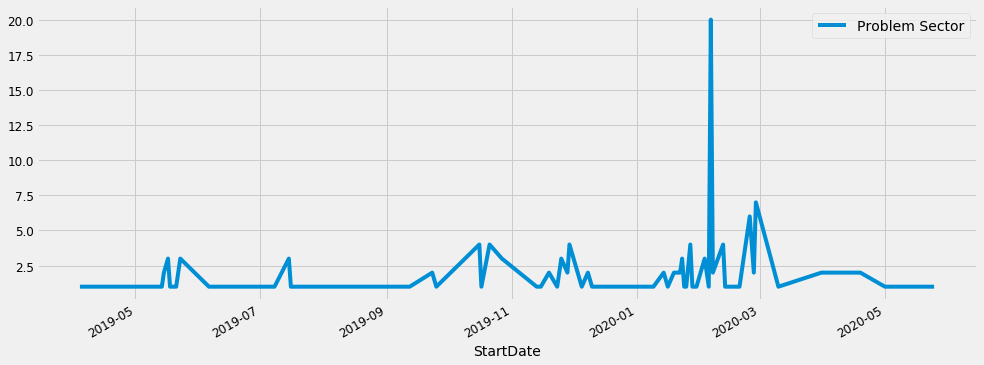

In [10]:
sdata_S = data_SF[['StartDate', 'Problem Sector']]
SF = sdata_S.groupby(["StartDate"]).count().sort_values("Problem Sector", ascending=False)

print(SF["Problem Sector"])


SF.plot(figsize=(15, 6))
plt.show()

In [14]:
p= data_SF.loc[data_SF['StartDate'] =='2020-02-06', 'Problem Sector']
p

35    General
36    General
37    General
38    General
39    General
40    General
41    General
42    General
43    General
44    General
45    General
46    General
47    General
48    General
49    General
50    General
51    General
52    General
53    General
54    General
Name: Problem Sector, dtype: object